<a href="https://colab.research.google.com/github/Metallicode/Math/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("bank-full.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<Axes: xlabel='age', ylabel='Count'>

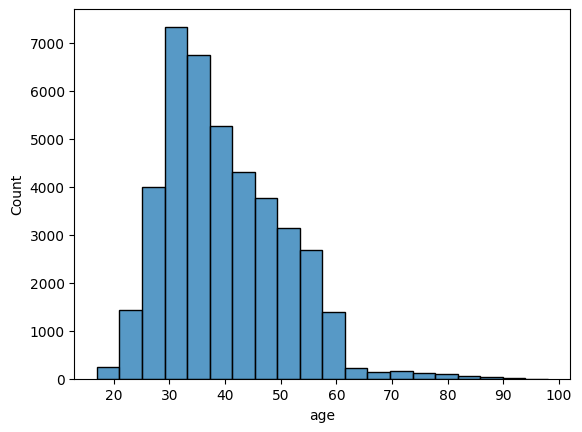

In [8]:
sns.histplot(data=df, x="age", bins=20)

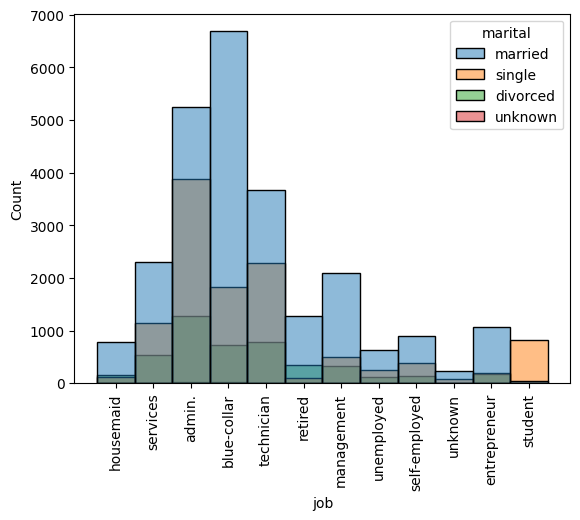

In [13]:
sns.histplot(data=df, x="job", hue="marital")
plt.xticks(rotation=90);

<Axes: xlabel='marital', ylabel='count'>

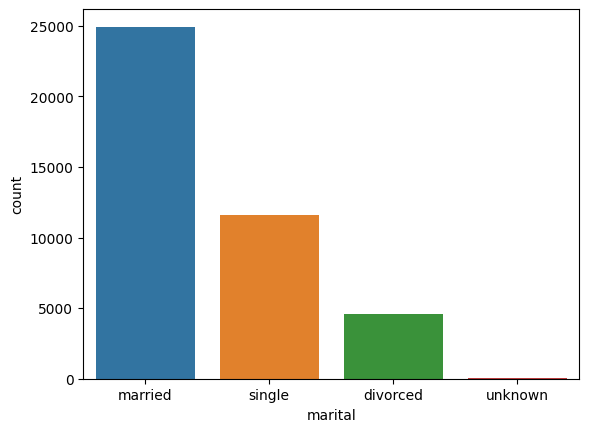

In [14]:
sns.countplot(data=df, x="marital")

<Axes: xlabel='contact', ylabel='Count'>

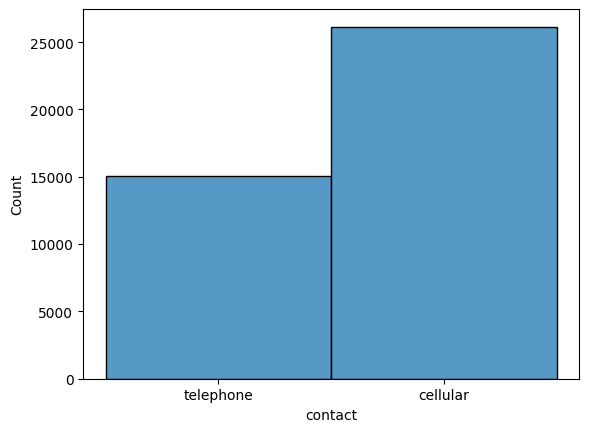

In [15]:
sns.histplot(data=df, x="contact", bins=20)

<Axes: xlabel='duration', ylabel='Count'>

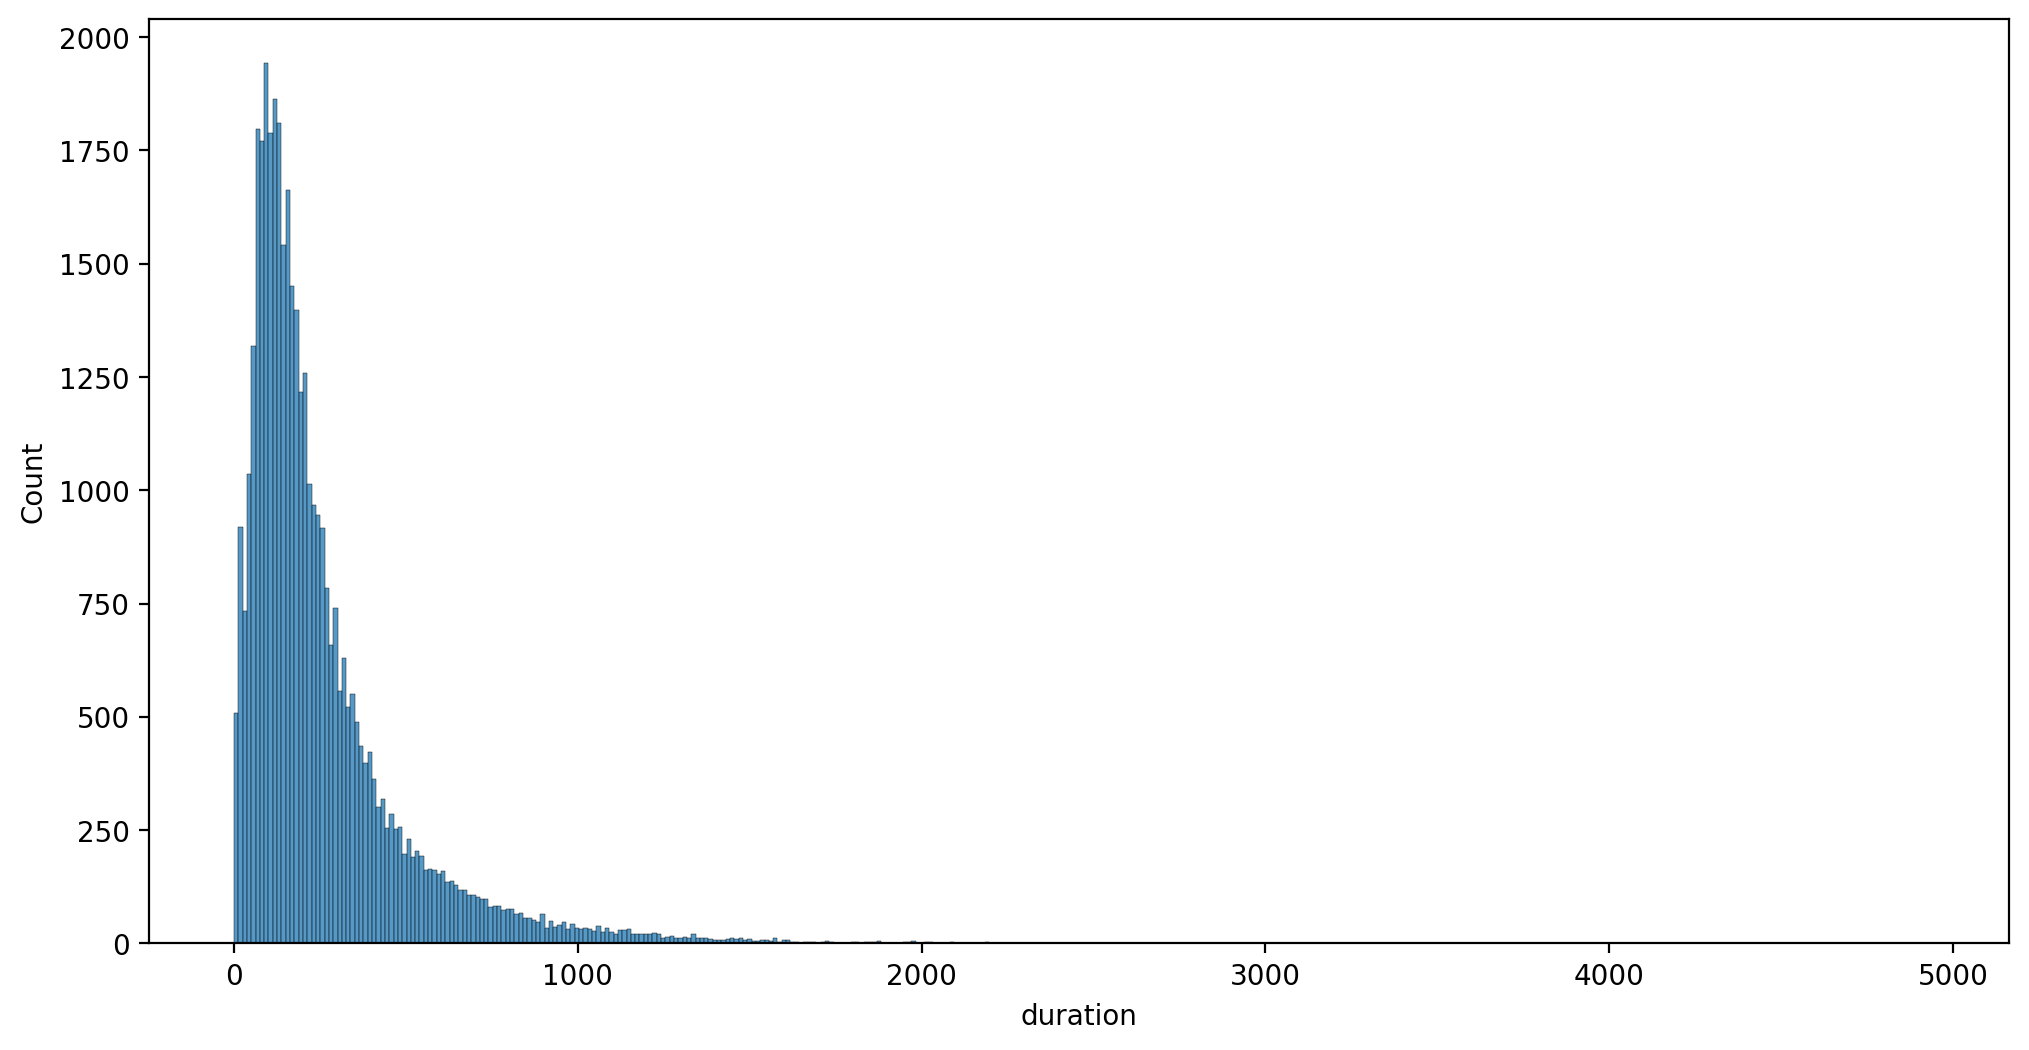

In [18]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x="duration")

<Axes: xlabel='duration', ylabel='Count'>

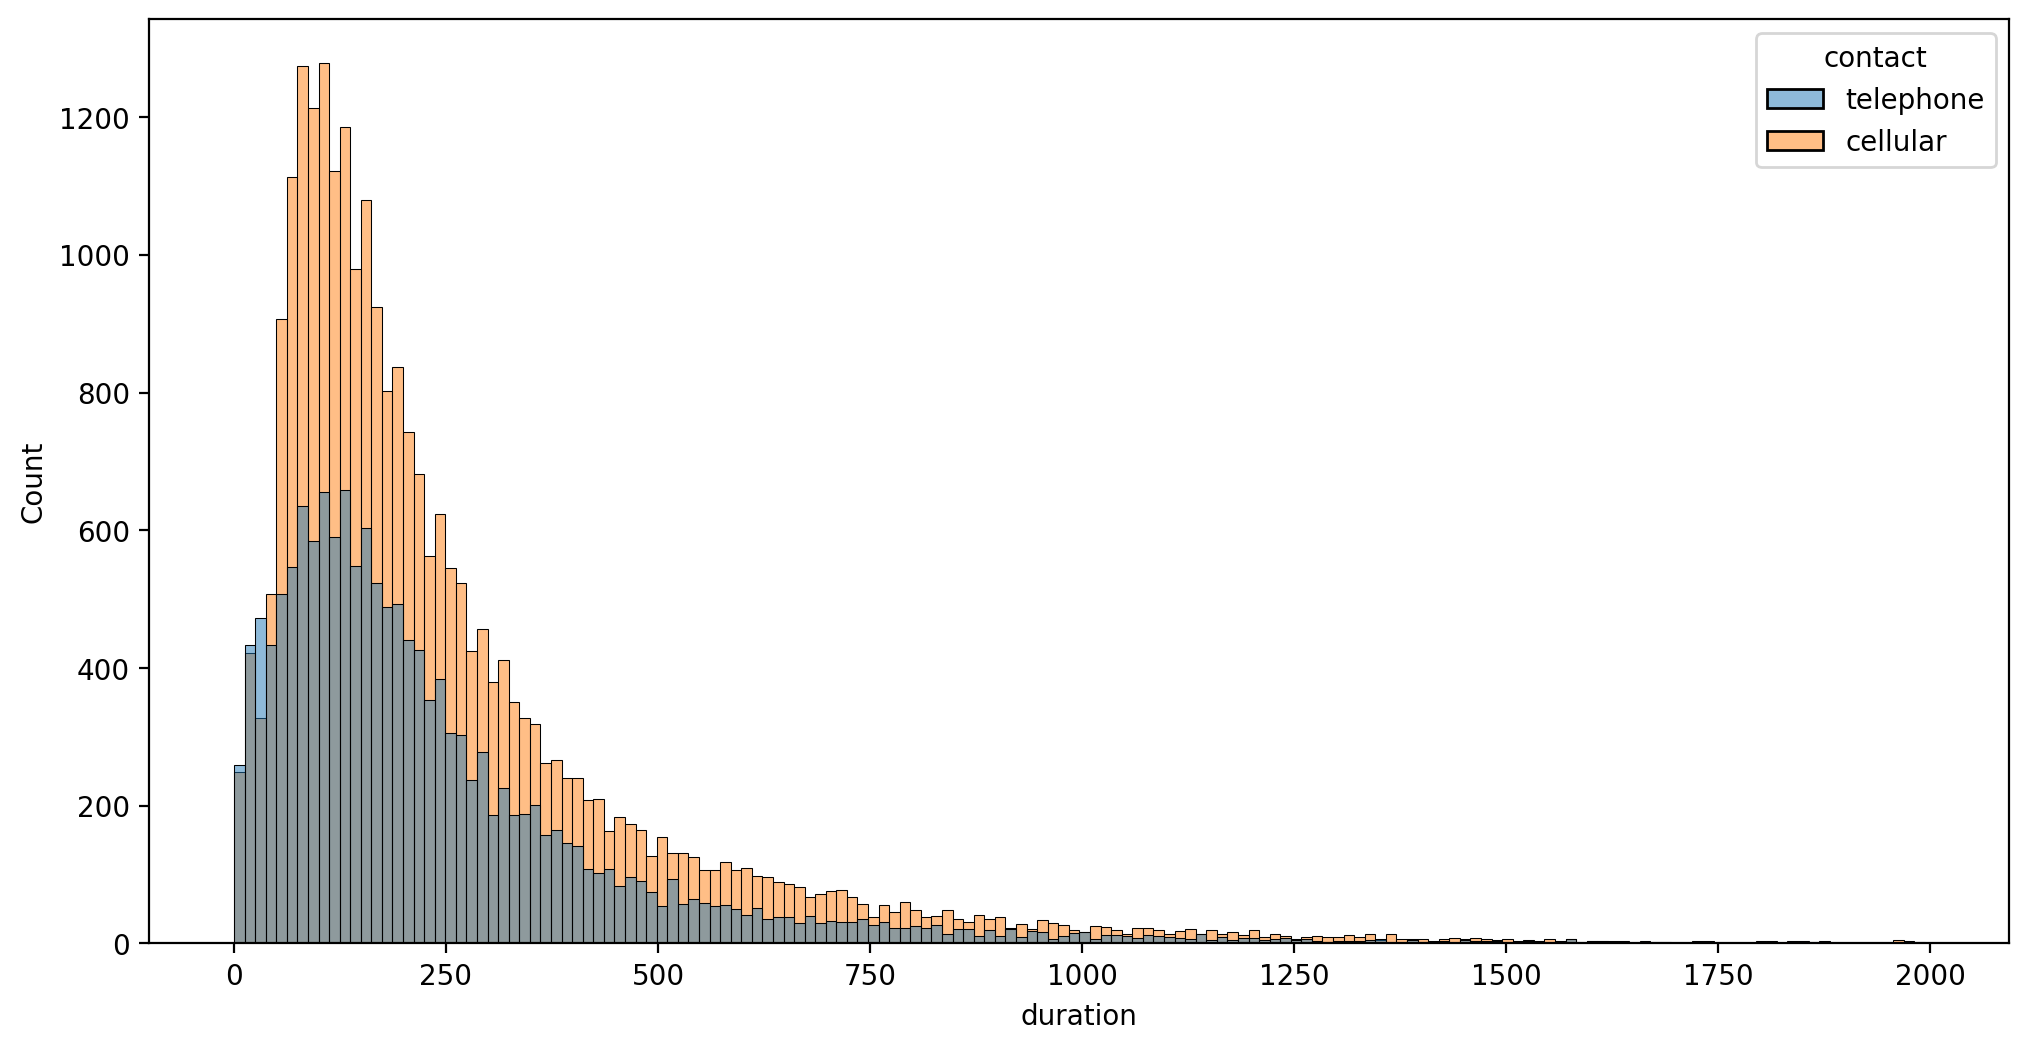

In [23]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df[df["duration"]<2000], x="duration", hue="contact")

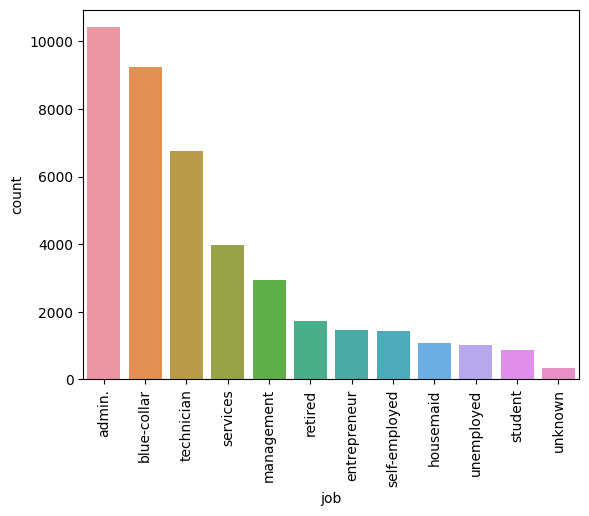

In [27]:
sns.countplot(data=df, x="job", order=df["job"].value_counts().index)
plt.xticks(rotation=90);

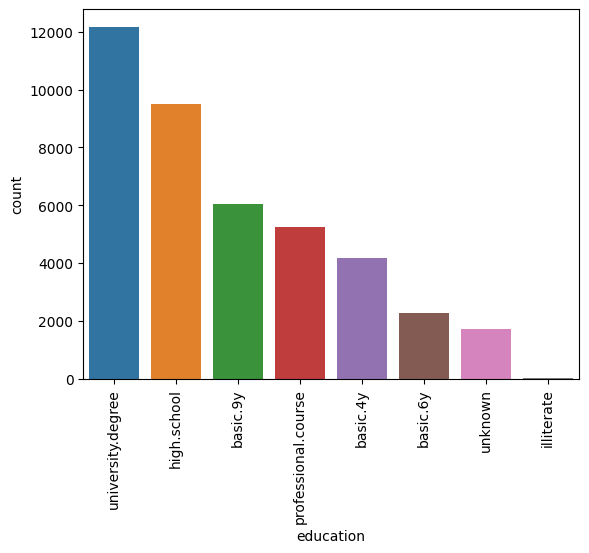

In [30]:
sns.countplot(data=df, x="education", order=df["education"].value_counts().index)
plt.xticks(rotation=90);

In [ ]:
df.columns

##Data Preparation

In [31]:
X = pd.get_dummies(df)

In [ ]:
X

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
X_scaled = scaler.fit_transform(X)

##Using sklearn KMeans

In [36]:
from sklearn.cluster import KMeans

In [37]:
model = KMeans(n_clusters=2)

In [38]:
labels = model.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
X["labels"] = labels

<Axes: >

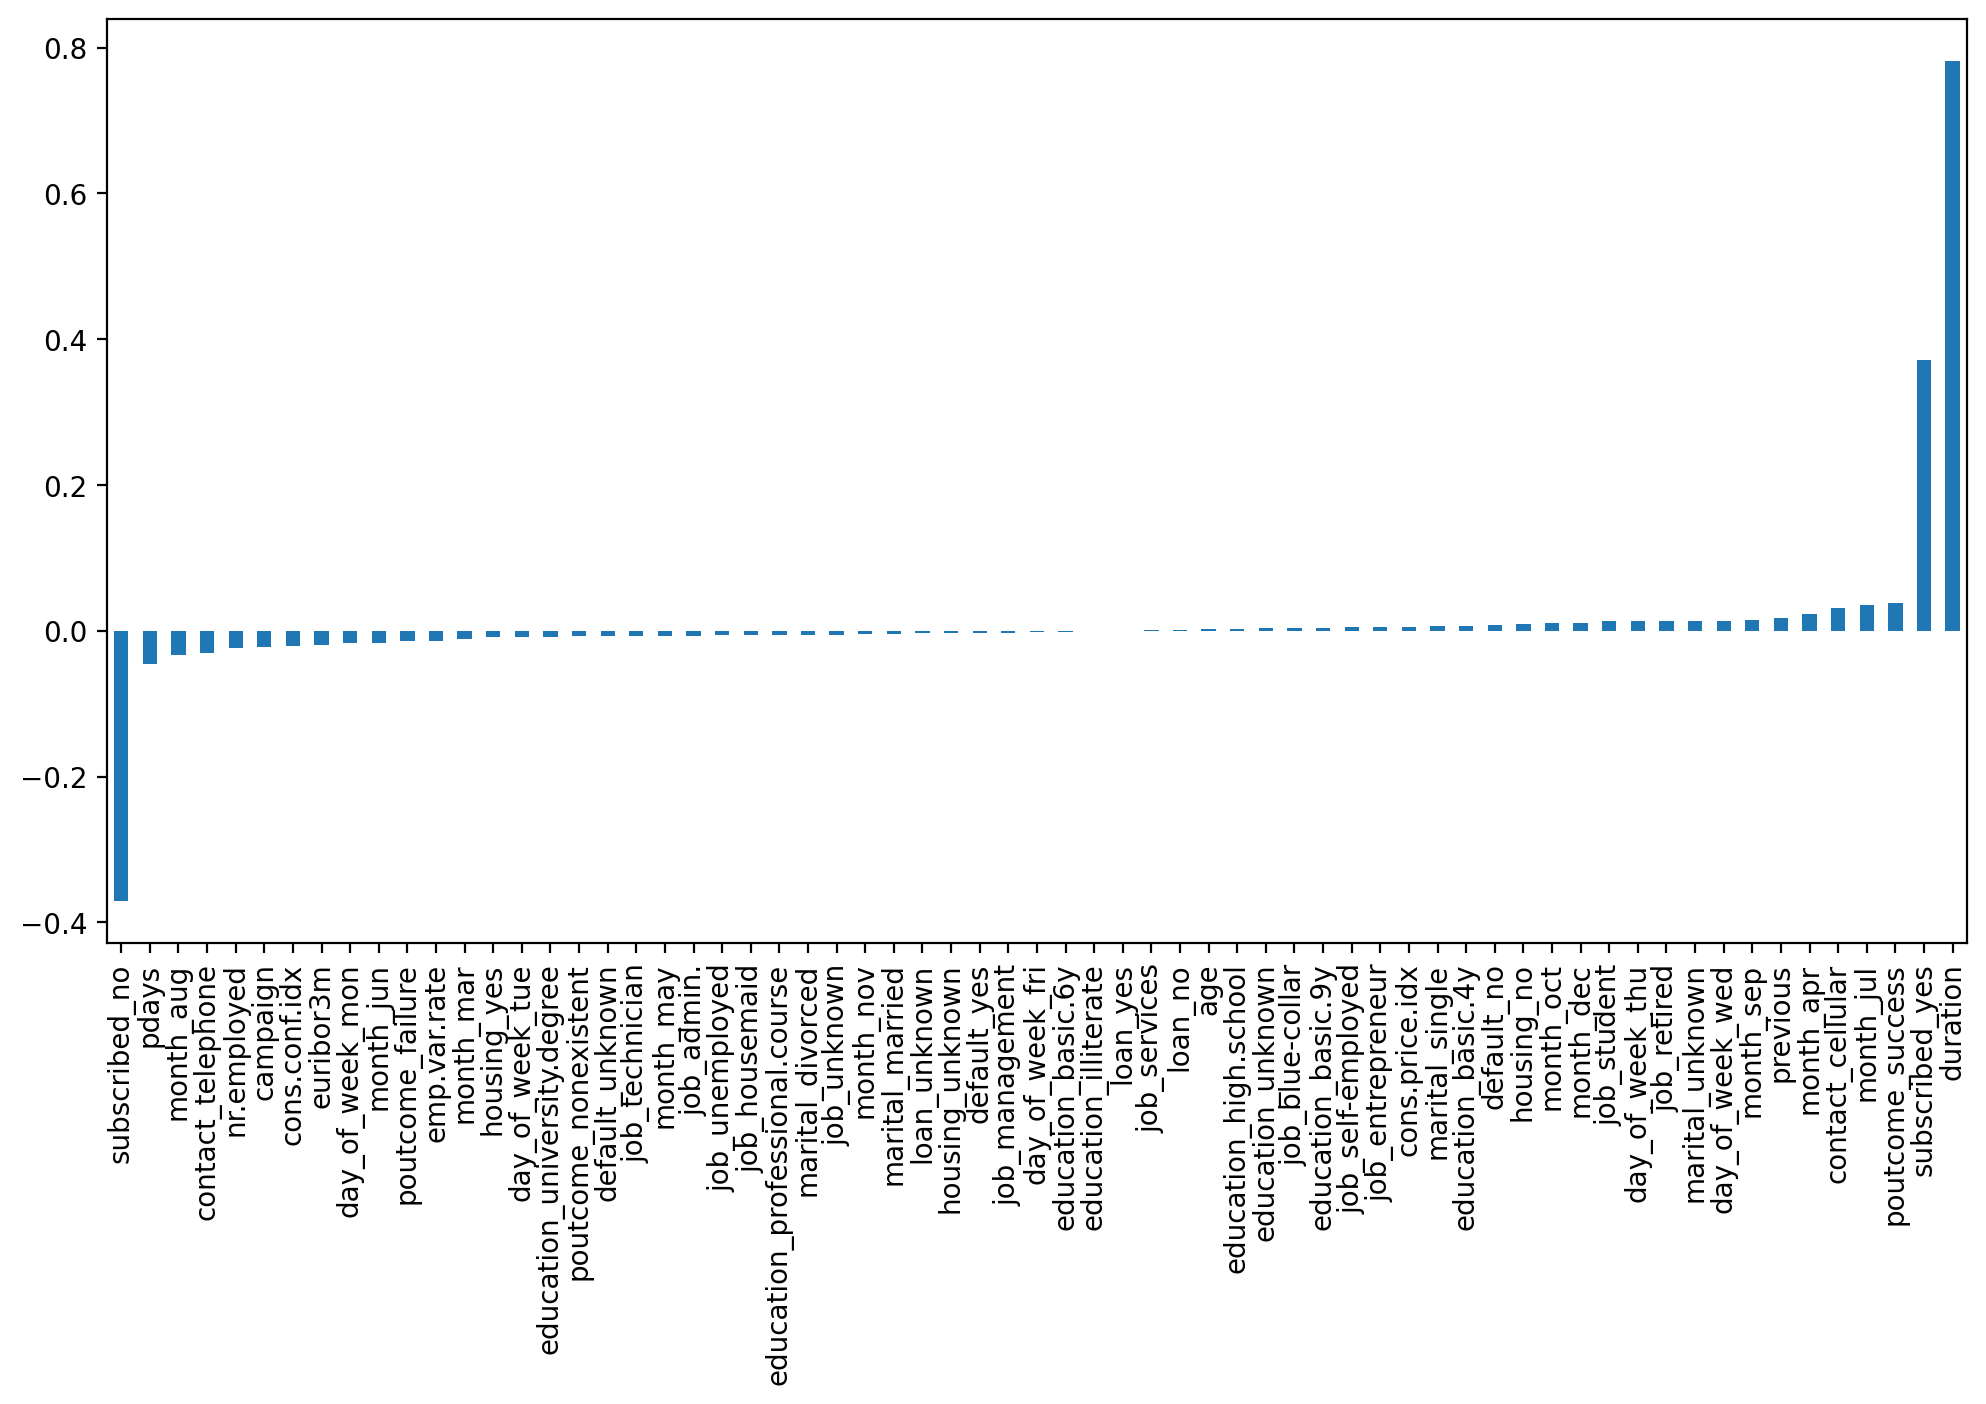

In [46]:
plt.figure(figsize=(12,6), dpi=200)

X.corr()["labels"].iloc[:-1].sort_values().plot(kind="bar")
